In [1]:
#
# Mainly for analyzing ensemble-averaged MSD for separeted vege files
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import listdir
import pickle
#from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import brunnermunzel, linregress
from sklearn.linear_model import LinearRegression

In [2]:
dir_save = 'summary_results'
print(dir_save)
os.makedirs(dir_save, exist_ok=True)

summary_results


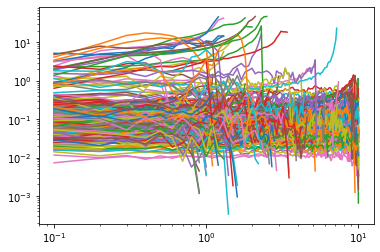

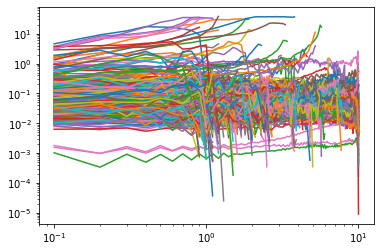

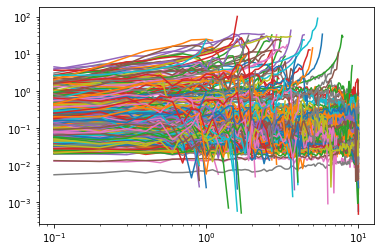

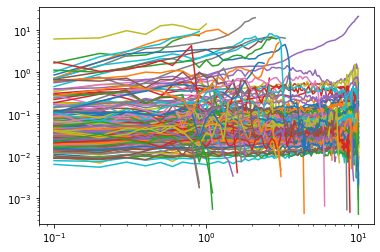

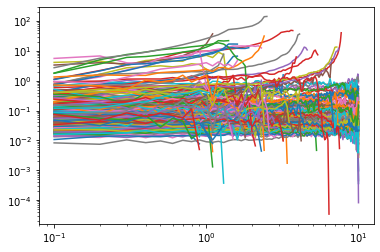

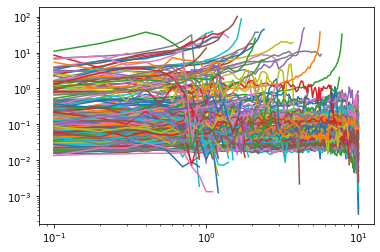

In [4]:
strain = ['vege_1', 'vege_2', 'vege_3', 'spore_1', 'spore_2', 'spore_3']
msds_strain = []
for i in strain:
    file_id = i
    #df = pd.read_csv(os.path.join('data', file_id + '.csv'))
    dir_read = 'results_' + file_id
    dir_read = dir_read.replace('-', '_')
    with open (os.path.join(dir_read, 'msds'), 'rb') as fp:
        msds = pickle.load(fp)
        msds_strain.append(msds)

for msds in msds_strain:
    fig, ax = plt.subplots()
    for msd in msds:
        ts = 0.1 * np.arange(msd.shape[0])
        plt.loglog(ts[1:], msd[1:])

LinregressResult(slope=0.3198910987347309, intercept=-0.5542993789388602, rvalue=0.9810476488347323, pvalue=5.517202127042098e-07, stderr=0.022338091674923614)
LinregressResult(slope=0.5183178566977605, intercept=-0.9471693975195484, rvalue=0.9771006429557132, pvalue=1.1702719194902613e-06, stderr=0.03990597365540415)
LinregressResult(slope=0.4171682367436061, intercept=-0.2585614234264895, rvalue=0.991659230424521, pvalue=2.096278943060676e-08, stderr=0.01916965778623771)
LinregressResult(slope=0.4227829445965593, intercept=-0.8081072806485825, rvalue=0.969745137547866, pvalue=3.5342993725245993e-06, stderr=0.037628548415101985)
LinregressResult(slope=0.4979561820309856, intercept=-0.33765473734860885, rvalue=0.9863950693091947, pvalue=1.474536066125815e-07, stderr=0.029341088635209553)
LinregressResult(slope=0.3306916687216293, intercept=0.0681052274298013, rvalue=0.9727237011458849, pvalue=2.3433285162988427e-06, stderr=0.027881402341065165)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Diffusion time exponents:  [0.3198910987347309, 0.5183178566977605, 0.4171682367436061, 0.4227829445965593, 0.4979561820309856, 0.3306916687216293]


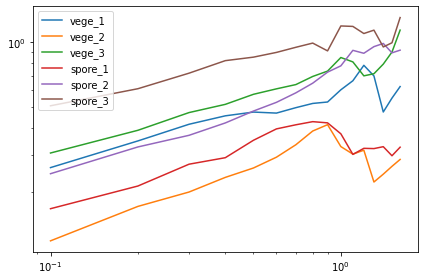

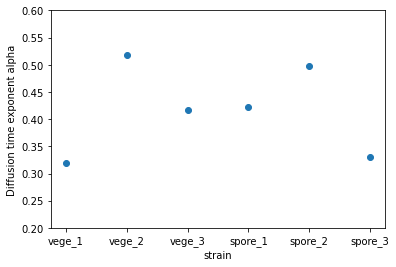

In [8]:
#
# Ensemble-averaged MSDs during germination
#
ens_msds_strain = []
for i, msds in zip(strain, msds_strain):
    df_msds = pd.DataFrame(msds)
    #print(df_msds)
    ens_msd = df_msds.mean(0, skipna=True).values
    ens_msds_strain.append(ens_msd)
    #print(ens_msd)
    np.savetxt(os.path.join(dir_save, 'ens_msd_' + str(i) + '.txt'), ens_msd)

alphas = []
fig, ax = plt.subplots()
ts = 0.1 * np.arange(ens_msds_strain[0].shape[0])
for i, ens_msd in zip(strain, ens_msds_strain):
    label = str(i)
    plt.loglog(ts[1:17], ens_msd[1:17], label=label)
    res = linregress(np.log(ts[1:11]), np.log(ens_msd[1:11]))
    print(res)
    alphas.append(res.slope)

plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'ens_msd_strain.eps'))

print('Diffusion time exponents: ', alphas)
np.savetxt(os.path.join(dir_save, 'alphas.txt'), alphas)

fig, ax = plt.subplots()
plt.scatter(strain, alphas)
plt.ylim(0.2,0.6)
plt.xlabel('strain')
plt.ylabel('Diffusion time exponent alpha')
plt.savefig(os.path.join(dir_save, 'alpha_strain.eps'))
plt.savefig(os.path.join(dir_save, 'alpha_strain.png'))
